------
<h1>
    <center>
        Centroid Data Augmentation<br><br>Ibadan & Kano<br>
    </center>
</h1>

------


## Imports of Required Packages and Setup

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


## Load and Explore the Data

### Ibadan LGA and EA Polygons

In [3]:
fname = "../data-in/NGA/kano_ibadan_shape_files/Ibadan_metro_fiveLGAshapes/Ibadan_metro_fiveLGAshapes.shp"
ib_LGAs = gpd.read_file(fname)

fname = "../data-in/NGA/kano_ibadan_shape_files/Ibadan_metro_ward_fiveLGAs/Ibadan_metro_fiveLGAs.shp"
ib_Wards = gpd.read_file(fname)


In [4]:
ib_LGAs.head(3)   


,LGACode,LGAName,StateCode,Source,Timestamp,GlobalID,AMAPCODE,geometry
0,31006,Ibadan North,OY,eHA_Polio,2019-08-09,fb782fd3-1a49-4bfa-9a64-c9561cc1c0bc,NIE OYS BDJ,"POLYGON ((3.89913 7.37960, 3.89888 7.37942, 3...."
1,31007,Ibadan North East,OY,WHO,2019-08-09,60dae0a9-7b69-47e9-9024-1e425fb61499,NIE OYS AGG,"POLYGON ((3.92804 7.39108, 3.92817 7.39105, 3...."
2,31008,Ibadan North West,OY,WHO,2019-08-09,818501be-e639-4414-b2df-ca32662cde7b,NIE OYS NRK,"POLYGON ((3.89160 7.37727, 3.89155 7.37730, 3...."


In [5]:
# Plot training data in an interactive map
# field = "LGAName"
# axm = ib_LGAs.explore(column=field, categorical=True, legend=True, tiles="OpenStreetMap Mapnik")
# axm


In [6]:
ib_Wards.head(3)


,StateCode,WardCode,WardName,LGACode,Urban,Source,Timestamp,GlobalID,AMAPCODE,geometry
0,OY,OYSINE01,Agugu,31007,Yes,INEC,2019-03-16,0c68a884-f471-48da-8843-0be263586f01,NIE OYS AGG,"POLYGON ((3.91744 7.38072, 3.91755 7.38068, 3...."
1,OY,OYSINE02,Alafara,31007,Yes,INEC,2019-03-16,fa5a252f-028e-4685-ae31-fb8859db8512,NIE OYS AGG,"POLYGON ((3.90645 7.38073, 3.90619 7.38071, 3...."
2,OY,OYSINE11,Oke Adu,31007,Yes,INEC,2019-03-16,d2d736a9-691b-44a7-b382-29756ee5f9d4,NIE OYS AGG,"POLYGON ((3.90994 7.38446, 3.90986 7.38450, 3...."


In [7]:

# ib_Wards.explore(column="WardName", categorical=True, legend=False, tiles="OpenStreetMap Mapnik")


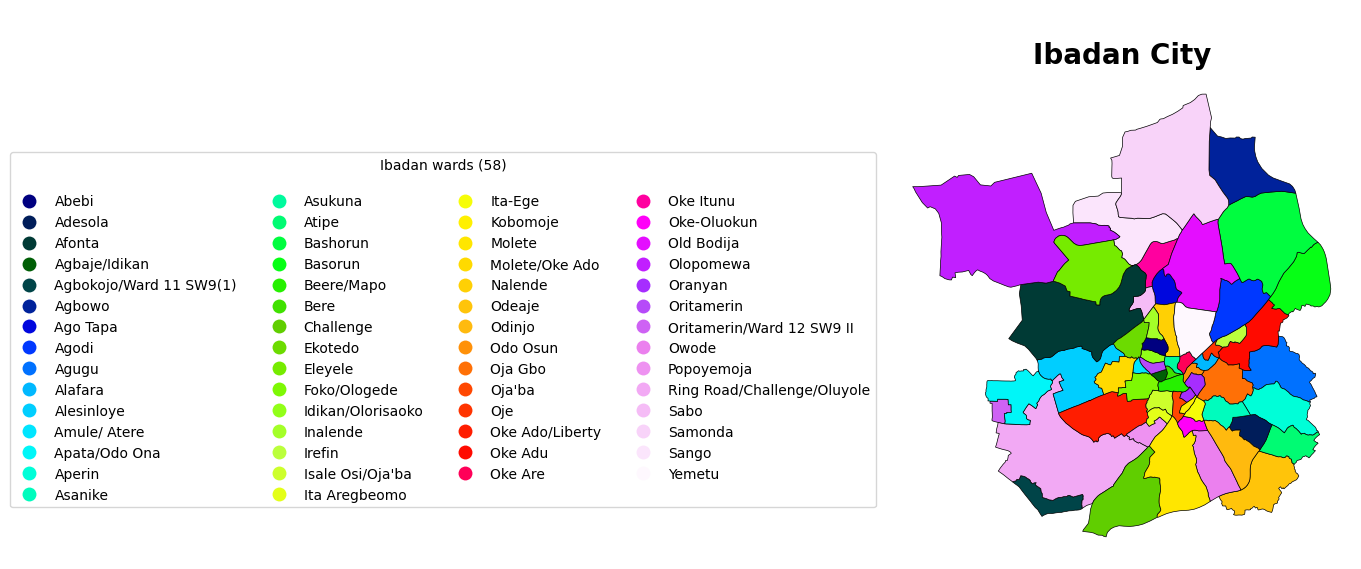

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
ib_Wards.plot(ax=ax, column="WardName", legend=True,
             legend_kwds={'bbox_to_anchor': (-0.02, 0.85),
                          "ncol": 4,
                          "title": f"Ibadan wards ({ib_Wards.WardName.unique().size})\n",},
             cmap="gist_ncar", edgecolor="k", linewidth=0.5)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax.spines[edge].set_visible(False)
ax.set_title("\nIbadan City", fontdict={"size": 20, "weight": "bold"})

fig.tight_layout();


In [9]:
# , marker_type="marker"


### Kano LGA and EA Polygons

In [10]:
### input file path
path = "../data-in/NGA/kano_ibadan_shape_files/Kano_metro_sixLGA_shapes/Kano_metro_sixLGA_shapes.shp"

### Load input data shapefile
kano_LGAs = gpd.read_file(path)

### Plot first three rows
kano_LGAs.head()


,LGACode,LGAName,StateCode,Source,Timestamp,GlobalID,AMAPCODE,geometry
0,20001,Tarauni,KN,eHA_Polio,2019-08-09,7674a7b6-2666-4106-a1cb-d4eb2ef12e10,NIE KNS TRN,"POLYGON ((8.56568 11.94601, 8.56566 11.94590, ..."
1,20012,Gwale,KN,eHA_Polio,2019-08-09,7be3de80-8da4-426c-a31e-6461db188022,NIE KNS GWL,"POLYGON ((8.49599 11.97974, 8.49601 11.97930, ..."
2,20024,Dala,KN,eHA_Polio,2019-08-09,fd91f49c-141d-4f2f-9a2c-3f5afb13fbe2,NIE KNS DAL,"POLYGON ((8.50724 11.99980, 8.50692 11.99938, ..."
3,20030,Fagge,KN,eHA_Polio,2019-08-09,693440ea-aed3-49df-b33b-7db55e74ea67,NIE KNS FGE,"POLYGON ((8.54172 12.00468, 8.54239 12.00457, ..."
4,20037,Nassarawa,KN,eHA_Polio,2019-08-09,9d51bc95-017a-4276-91f0-a34adc237f64,NIE KNS NSR,"POLYGON ((8.56559 11.97650, 8.56546 11.97696, ..."


In [11]:
# kano_LGAs.explore(column="LGAName", legend=True)


In [12]:
### input file path
path = "../data-in/NGA/kano_ibadan_shape_files/Kano_metro_ward_sixLGAs/Kano_metro_ward_sixLGAs.shp"

### Load input data shapefile
kano_Wards = gpd.read_file(path)

### Plot first five rows
kano_Wards.head()


,StateCode,WardCode,WardName,LGACode,Urban,Source,Timestamp,GlobalID,AMAPCODE,geometry
0,KN,KN3103,Gawuna,20037,No,INEC,2019-03-16,9146ae2b-d2d7-4141-ae96-125877e3d0bc,NIE KNS NSR GAW,"POLYGON ((8.54457 12.02027, 8.54458 12.02125, ..."
1,KN,KN3109,Kawaji,20037,Yes,INEC,2019-03-16,421ca7ff-9ecc-4a98-838a-3cdffb33fda4,NIE KNS NSR KAW,"POLYGON ((8.56026 12.01194, 8.56044 12.01201, ..."
2,KN,KN3108,Kaura Goje,20037,Yes,INEC,2019-03-16,77eeba60-94f1-4266-b945-cc74e86aa70f,NIE KNS NSR KAG,"POLYGON ((8.54650 12.03483, 8.54610 12.03483, ..."
3,KN,KN3102,Gama,20037,Yes,INEC,2019-03-16,aeebfec2-9400-4cc2-a946-4e693bdc294c,NIE KNS NSR GAM,"POLYGON ((8.54650 12.03483, 8.54727 12.03497, ..."
4,KN,KN3104,Giginyu,20037,Yes,INEC,2019-03-16,cbc390f5-3619-4f75-9043-1fe73bf1afd5,NIE KNS NSR GIG,"POLYGON ((8.57562 11.97560, 8.57436 11.97605, ..."


In [13]:
# kano_EAs.explore(column="WardName", legend=False)


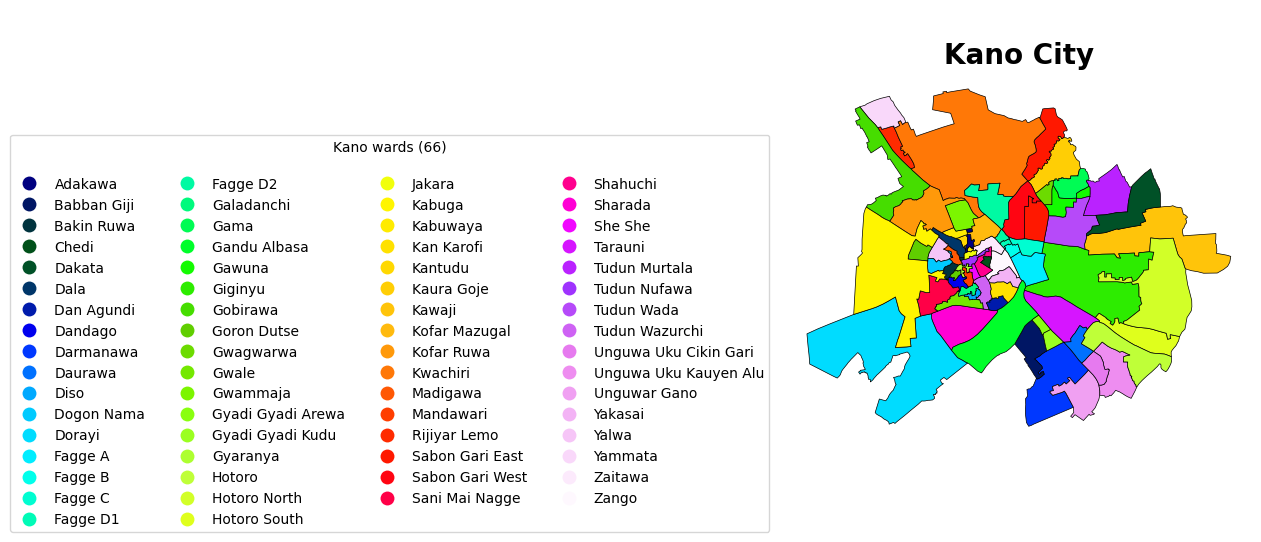

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
kano_Wards.plot(ax=ax, column="WardName", legend=True,
             legend_kwds={'bbox_to_anchor': (-0.02, 0.85),
                          "ncol": 4,
                          "title": f"Kano wards ({kano_Wards.WardName.unique().size})\n",},
             cmap="gist_ncar", edgecolor="k", linewidth=0.5)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax.spines[edge].set_visible(False)
ax.set_title("\nKano City", fontdict={"size": 20, "weight": "bold"})

fig.tight_layout();


### LGA and Ward levels

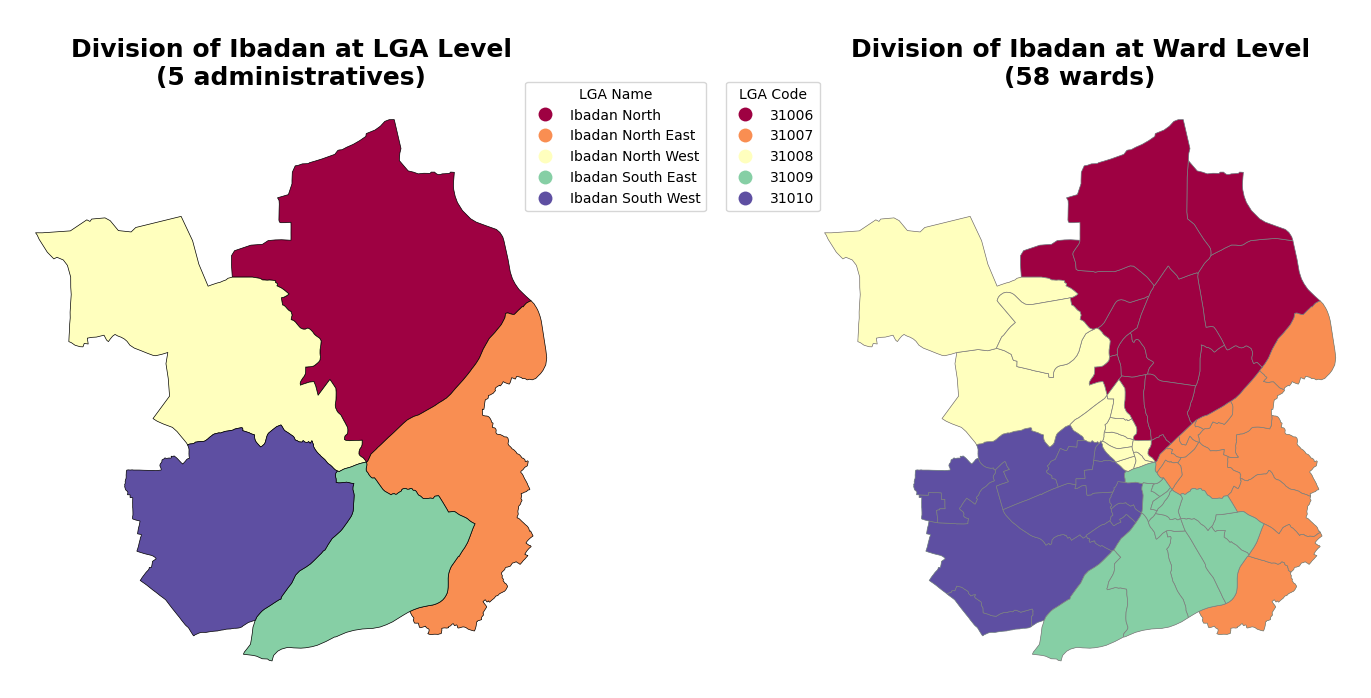

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ib_LGAs.plot(ax=ax[0], column="LGAName", cmap="Spectral",
                   legend=True, legend_kwds={'bbox_to_anchor': (1.25, 1.03), "title": "LGA Name"},
                   edgecolor="k", linewidth=0.5)
ib_Wards.plot(ax=ib_LGAs.plot(ax=ax[1], column="LGAName", legend=False),
                   column="LGACode", cmap="Spectral", legend=True,
                   legend_kwds={'bbox_to_anchor': (.05, 1.03), "title": "LGA Code"}, 
                   edgecolor="gray", linewidth=0.5)
###
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
###
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax[0].spines[edge].set_visible(False)
    ax[1].spines[edge].set_visible(False)


ax[0].set_title(f"\nDivision of Ibadan at LGA Level\n({ib_LGAs.LGAName.unique().size} administratives)", fontdict={"size": 18, "weight": "bold"})
ax[1].set_title(f"\nDivision of Ibadan at Ward Level\n({ib_Wards.WardName.unique().size} wards)", fontdict={"size": 18, "weight": "bold"})
fig.tight_layout();


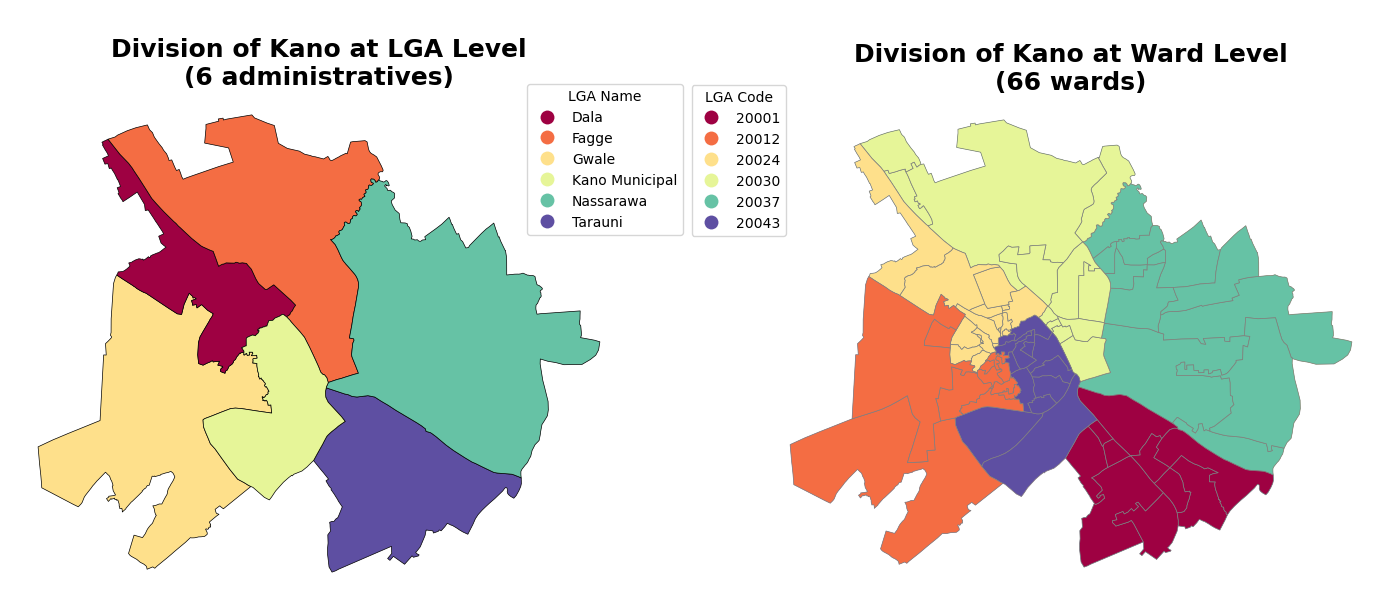

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

kano_LGAs.plot(ax=ax[0], column="LGAName", cmap="Spectral",
                   legend=True, legend_kwds={'bbox_to_anchor': (1.1, 1.03), "title": "LGA Name"},
                   edgecolor="k", linewidth=0.5)
kano_Wards.plot(ax=kano_LGAs.plot(ax=ax[1], column="LGAName", legend=False),
                   column="LGACode", cmap="Spectral", legend=True,
                   legend_kwds={'bbox_to_anchor': (.05, 1.04), "title": "LGA Code"}, 
                   edgecolor="gray", linewidth=0.5)
###
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
###
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax[0].spines[edge].set_visible(False)
    ax[1].spines[edge].set_visible(False)


ax[0].set_title(f"\nDivision of Kano at LGA Level\n({kano_LGAs.LGAName.unique().size} administratives)", fontdict={"size": 18, "weight": "bold"})
ax[1].set_title(f"\nDivision of Kano at Ward Level\n({kano_Wards.WardName.unique().size} wards)", fontdict={"size": 18, "weight": "bold"})
fig.tight_layout();


In [17]:
### input file path
path = "../data-in/NGA/kano_ibadan_shape_files/Kano_metro_sixLGAs_other_layers/fe_roads_major_export/fe_roads_major_export.shp"

### Load input data shapefile
kano_roads = gpd.read_file(path)

### Plot first five rows
kano_roads.head()


,WardName,WardCode,LGACode,StateCode,Name,properties,Source,Timestamp,GlobalID,geometry
0,Tarauni,KN3807,20001,KN,None,None,\\esri.com\psdata\LGT_Projects\Nigeria\Data\Or...,2012-06-16,e637161a-3891-428c-b4c3-94a4127dbd3b,"LINESTRING (8.54060 11.97930, 8.54050 11.97940..."
1,Tarauni,KN3807,20001,KN,None,None,\\esri.com\psdata\LGT_Projects\Nigeria\Data\Or...,2012-06-16,35a5f328-f843-46d1-8cb0-998e4a9c14b6,"LINESTRING (8.54040 11.97950, 8.54030 11.97950..."
2,Tarauni,KN3807,20001,KN,None,None,\\esri.com\psdata\LGT_Projects\Nigeria\Data\Or...,2012-06-16,3fd84dc9-c5fc-4141-974c-7b995ef75e40,"LINESTRING (8.54050 11.97920, 8.54060 11.97930)"
3,Tarauni,KN3807,20001,KN,None,None,\\esri.com\psdata\LGT_Projects\Nigeria\Data\Or...,2012-06-16,f6218ea6-cabc-45bd-a1a7-2bf2b1ed2e00,"LINESTRING (8.54090 11.98000, 8.54070 11.98020..."
4,Darmanawa,KN3802,20001,KN,None,None,\\esri.com\psdata\LGT_Projects\Nigeria\Data\Or...,2012-06-16,6d98a56b-35e3-4236-b5c0-d86cf3f9bf81,"LINESTRING (8.54810 11.95770, 8.54690 11.95900..."


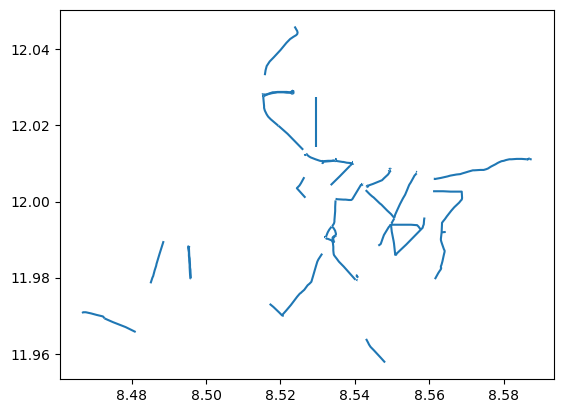

In [18]:
kano_roads.plot(); # explore(column="WardName", categorical=True, legend=True, tiles="OpenStreetMap Mapnik");


## Ibadan EA Classification

In [19]:
filename = "../data-in/Ibadan_centoids_data.csv"
ib_EAs = pd.read_csv(filename, index_col=0)
ib_EAs.head()


,settlement_type_new,Ward,ea_numbers_new,longitude,latitude
1,Informal,AGUGU,AGUGU_001/012,3.919233,7.385282
2,Informal,AGUGU,AGUGU_003/022,3.920601,7.383531
3,Informal,AGUGU,AGUGU_004/035,3.926174,7.379370
4,Informal,AGUGU,AGUGU_005/032,3.920879,7.391955
5,Informal,AGUGU,AGUGU_009/014,3.922697,7.379974


In [20]:
ib_EAs.Ward.unique()


array(['AGUGU', 'BASHORUN', 'CHALLENGE', 'OLOGUNERU'], dtype=object)

### Make geometry `POINT(x, y)` to ease the visualization

In [37]:
points = [Point(x, y) for x, y in zip(ib_EAs["longitude"], ib_EAs["latitude"])]
geo_ib_EAs = gpd.GeoDataFrame(ib_EAs.rename(columns={"settlement_type_new": "lc",
                                                     "ea_numbers_new": "EA_number",
                                                     "latitude":"lat", "longitude": "lon"}),
                              geometry=points, crs="EPSG:4326")

###
geo_ib_EAs.head()


,lc,Ward,EA_number,lon,lat,geometry
1,Informal,AGUGU,AGUGU_001/012,3.919233,7.385282,POINT (3.91923 7.38528)
2,Informal,AGUGU,AGUGU_003/022,3.920601,7.383531,POINT (3.92060 7.38353)
3,Informal,AGUGU,AGUGU_004/035,3.926174,7.379370,POINT (3.92617 7.37937)
4,Informal,AGUGU,AGUGU_005/032,3.920879,7.391955,POINT (3.92088 7.39195)
5,Informal,AGUGU,AGUGU_009/014,3.922697,7.379974,POINT (3.92270 7.37997)


In [22]:
for i, row in geo_ib_EAs.head(1).iterrows():
    # print(i)
    print(row)


lc                                            Informal
Ward                                             AGUGU
EA_number                                AGUGU_001/012
lon                                           3.919233
lat                                           7.385282
geometry     POINT (3.91923272544479 7.38528184707015)
Name: 1, dtype: object


In [23]:
pd.Series(row.to_dict())


lc                                            Informal
Ward                                             AGUGU
EA_number                                AGUGU_001/012
lon                                           3.919233
lat                                           7.385282
geometry     POINT (3.91923272544479 7.38528184707015)
dtype: object

In [24]:
dd = row.to_dict()
dd


{'lc': 'Informal',
 'Ward': 'AGUGU',
 'EA_number': 'AGUGU_001/012',
 'lon': 3.91923272544479,
 'lat': 7.38528184707015,
 'geometry': <POINT (3.919 7.385)>}

In [25]:
dd.update({"lon": 3.92, "lat": 7.39})
dd


{'lc': 'Informal',
 'Ward': 'AGUGU',
 'EA_number': 'AGUGU_001/012',
 'lon': 3.92,
 'lat': 7.39,
 'geometry': <POINT (3.919 7.385)>}

In [38]:
m = ib_Wards.explore(column="WardName", legend=False, tiles="OpenStreetMap Mapnik")
geo_ib_EAs.rename(columns={"lc": "Settlement Type"}).explore(m=m, column="Settlement Type",
                                                     categorical=True, legend=True, tiles="OpenStreetMap Mapnik")


In [39]:
### Get rid of the outliers
geo_df = geo_ib_EAs.sort_values("lat").iloc[:-2, :]


In [73]:
m = ib_Wards.explore(column="WardName", legend=False)
geo_df.rename(columns={"lc": "Settlement Type"}).explore(m=m, column="Settlement Type", # marker_type="marker", marker_size=1,
                                                     categorical=True, legend=True, height=200, width=200)


## Generate Samples within Centroid Neighbourhood

### Working with latitude (lat) / longitude (lon) and distance

The approximate conversions are:
- Latitude: `1° = 110574 m`
- Longitude: `1° = 111320 * cos(latitude) m`

**Remarks:**
- `cos(0°) = 1`, therefore, there is no correction factor applied doing the calculation at the equator because latitude equals to `0°`. The longitudes are the widest there.
- `cos(90°) = 0`, At the poles the longitudes meet in one point. There is no distance to be calculated.

In [ ]:
for _, row in geo_ib_EAs.head(3).iterrows():
        # Extract longitude and latitude
        cent_lon = row.loc["lon"]
        cent_lat = row.loc["lat"]
        
        row.update({"lon": 3.92, "lat": 7.39})


### Helper functions

In [74]:
import random

def sample_random_points(min_lon, min_lat, max_lon, max_lat, n):
    """
    Generate n random points within a rectangular box defined by (min_lon, min_lat) and (max_lon, max_lat).

    Parameters:
    min_lon (float): Minimum longitude of the rectangle.
    min_lat (float): Minimum latitude of the rectangle.
    max_lon (float): Maximum longitude of the rectangle.
    max_lat (float): Maximum latitude of the rectangle.
    n (int): Number of random points to generate.

    Returns:
    List[Tuple[float, float]]: List of tuples containing the random (longitude, latitude) points.
    """
    points = []
    
    for _ in range(n):
        lon = random.uniform(min_lon, max_lon)
        lat = random.uniform(min_lat, max_lat)
        points.append((lon, lat))
    
    return points


In [75]:
geo_df


,lc,Ward,EA_number,lon,lat,geometry
86,Formal,CHALLENGE,CHALLENGE_041/013,3.885773,7.335068,POINT (3.88577 7.33507)
66,Informal,CHALLENGE,CHALLENGE_011/029,3.874462,7.336565,POINT (3.87446 7.33656)
91,Informal,CHALLENGE,CHALLENGE_044/031,3.891438,7.337091,POINT (3.89144 7.33709)
84,Informal,CHALLENGE,CHALLENGE_039/007,3.887648,7.337195,POINT (3.88765 7.33720)
63,Informal,CHALLENGE,CHALLENGE_006/009,3.873034,7.337766,POINT (3.87303 7.33777)
...,...,...,...,...,...,...
125,Informal,OLOGUNERU,OLOGUNERU_047/013,3.831244,7.433466,POINT (3.83124 7.43347)
103,Formal,OLOGUNERU,OLOGUNERU_002/020,3.831853,7.434109,POINT (3.83185 7.43411)
102,Formal,OLOGUNERU,OLOGUNERU_002/018,3.831853,7.434109,POINT (3.83185 7.43411)
127,Informal,OLOGUNERU,OLOGUNERU_051/002,3.829108,7.434513,POINT (3.82911 7.43451)


In [77]:
# Example usage
min_lon, min_lat = 3.88577, 7.33507
max_lon, max_lat = 3.87446, 7.33656
n = 10

random_points = sample_random_points(min_lon, min_lat, max_lon, max_lat, n)

# Print the generated points
for point in random_points:
    print(f"Longitude: {point[0]:.4f}, Latitude: {point[1]:.3f}")


Longitude: 3.8796, Latitude: 7.336
Longitude: 3.8770, Latitude: 7.335
Longitude: 3.8831, Latitude: 7.336
Longitude: 3.8830, Latitude: 7.336
Longitude: 3.8822, Latitude: 7.335
Longitude: 3.8758, Latitude: 7.336
Longitude: 3.8755, Latitude: 7.336
Longitude: 3.8803, Latitude: 7.335
Longitude: 3.8769, Latitude: 7.336
Longitude: 3.8846, Latitude: 7.336


In [ ]:
import math
def generate_rect_neighbourhood(ea_lon:float, ea_lat:float, box_width:float, box_height:float):
    """
    Generate new data points neighbouring the given EA with the simalar
    classification. The EA neighbourhood within which points are generated
    is a rectangle centered around the given EA location.

    Args:
        ea_lon (float): _description_
        ea_lat (float): _description_
        box_width (float): _description_
        box_height (float): _description_

    Returns:
        _type_: _description_
    """
    # Convert meters to degrees (approximate)
    meters_to_degrees_lon = (111320 * math.cos(ea_lat * math.pi / 180))
    meters_to_degrees_lat = 110574
    
    # Calculate the coordinates of the rectangle corners
    min_lon = ea_lon - (box_width / (2 * meters_to_degrees_lon))
    max_lon = ea_lon + (box_width / (2 * meters_to_degrees_lon))
    min_lat = ea_lat - (box_height / (2 * meters_to_degrees_lat))
    max_lat = ea_lat + (box_height / (2 * meters_to_degrees_lat))
    
    # Define the list of coordinates of endpoints of interest
    endpoint_coordinates = (min_lon, min_lat, max_lon, max_lat)
    
    # Define the rectangle coordinates in counterclockwise direction
    rectangle_coordinates = [
        [min_lon, min_lat],
        [min_lon, max_lat],
        [max_lon, max_lat],
        [max_lon, min_lat],
        [min_lon, min_lat]  # Closing the loop
    ]
    
    return endpoint_coordinates, rectangle_coordinates


In [89]:
def generate_rectangle(ea_lon, ea_lat, width, height):
    """
    Generate new data points neighbouring the given EA with the simalar
    classification. The EA neighbourhood within which points are generated
    is a rectangle centered around the given EA location.
    .
    
    Parameters:
    - center_lon: Longitude of the center point
    - center_lat: Latitude of the center point
    - width: Width of the rectangle in meters
    - height: Height of the rectangle in meters
    
    Returns:
    - List of coordinates representing the rectangle
    """
    # Convert meters to degrees (approximate)
    meters_to_degrees_lon = (111320 * math.cos(center_lat * math.pi / 180))
    meters_to_degrees_lat = 110574
    
    # Calculate the coordinates of the rectangle corners
    min_lon = center_lon - (width / (2 * meters_to_degrees_lon))
    max_lon = center_lon + (width / (2 * meters_to_degrees_lon))
    min_lat = center_lat - (height / (2 * meters_to_degrees_lat))
    max_lat = center_lat + (height / (2 * meters_to_degrees_lat))
    
    # Define the rectangle coordinates in counterclockwise direction
    rectangle_coordinates = [
        [min_lon, min_lat],
        [min_lon, max_lat],
        [max_lon, max_lat],
        [max_lon, min_lat],
        [min_lon, min_lat]  # Closing the loop
    ]
    
    return rectangle_coordinates


## Explore the Calculation of a Ceantroid Distance to the Nearest Roada 

### First exploration attempt

In [71]:
points = geo_df.copy()
# points = points.to_crs("EPSG:4326")
points["pointid"] = np.arange(points.shape[0]) # Create an id column
points["pointgeometry"] = points["geometry"] # Save the point geometry
points["geometry"] = points.buffer(0.0005)
points.head()


/var/folders/3h/6bwdt7vj1ld4s9qybqc445br0000gn/T/ipykernel_3410/1563332112.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points["geometry"] = points.buffer(0.0005)


,lc,Ward,EA_number,lon,lat,geometry,pointid,pointgeometry
86,Formal,CHALLENGE,CHALLENGE_041/013,3.885773,7.335068,"POLYGON ((3.88627 7.33507, 3.88627 7.33502, 3....",0,POINT (3.88577 7.33507)
66,Informal,CHALLENGE,CHALLENGE_011/029,3.874462,7.336565,"POLYGON ((3.87496 7.33656, 3.87496 7.33652, 3....",1,POINT (3.87446 7.33656)
91,Informal,CHALLENGE,CHALLENGE_044/031,3.891438,7.337091,"POLYGON ((3.89194 7.33709, 3.89194 7.33704, 3....",2,POINT (3.89144 7.33709)
84,Informal,CHALLENGE,CHALLENGE_039/007,3.887648,7.337195,"POLYGON ((3.88815 7.33720, 3.88815 7.33715, 3....",3,POINT (3.88765 7.33720)
63,Informal,CHALLENGE,CHALLENGE_006/009,3.873034,7.337766,"POLYGON ((3.87353 7.33777, 3.87353 7.33772, 3....",4,POINT (3.87303 7.33777)


In [72]:
m = ib_Wards.explore(column="WardName", legend=False)
points.rename(columns={"lc": "Settlement Type"}).explore(m=m, column="Settlement Type", # marker_type="marker", marker_size=1,
                                                     categorical=True, legend=True, height=200, width=200)


In [ ]:
def calc_nearest_road_distance(roads, points):
    """_summary_

    Args:
        roads (_type_): _description_
        points (_type_): _description_
    """
    ### Organize data of interest 
    roads = roads.to_crs(32616)
    roads = roads.drop_duplicates(subset="geometry") # There might be some duplicate roads on top of each other, drop them.

    points = points.to_crs(32616)
    points["pointid"] = np.arange(points.shape[0]) # Create an id column
    points["pointgeometry"] = points["geometry"] # Save the point geometry
    points["geometry"] = points.buffer(1000)
    
    ### Intersect to clip all roads with each buffer and get all road attributes
    clipped = points.overlay(roads, how="intersection", keep_geom_type=False)

    closest = []
    for group, frame in clipped.groupby("pointid"): # For each pointid and all lines intersecting its buffer
        # Calculate the distances to all roads intersecting the point buffer
        frame["distance"] = frame["pointgeometry"].distance(frame["geometry"]) # That is why we saved the point geometry
        m = frame[frame["distance"]==frame["distance"].min()] # Find the road closest road
        closest.append(m) # m is a dataframe, append it to closest list

    closest = gpd.pd.concat(closest) # Create a dataframe from the list

    # There are a few points that are exactly the same distance two different roads, I drop them. I dont know what you want to do
    closest = closest.drop_duplicates(subset="pointid")

    # You can then join the result back to the points
    points = points.merge(right=closest[["pointid","LINEARID","distance"]], how="left", on="pointid")

    


In [ ]:
### Load and organize data of interest 
roads = gpd.read_file(r"roads_filename.shp")
roads = roads.to_crs(32616)
roads = roads.drop_duplicates(subset="geometry") # There might be some duplicate roads on top of each other, drop them.

points = gpd.read_file(r"points_filename.shp")
points = points.to_crs(32616)
points["pointid"] = np.arange(points.shape[0]) # Create an id column
points["pointgeometry"] = points["geometry"] # Save the point geometry
points["geometry"] = points.buffer(10000)


In [ ]:
### Intersect to clip all roads with each buffer and get all road attributes
clipped = points.overlay(roads, how="intersection", keep_geom_type=False)

closest = []
for group, frame in clipped.groupby("pointid"): # For each pointid and all lines intersecting its buffer
    # Calculate the distances to all roads intersecting the point buffer
    frame["distance"] = frame["pointgeometry"].distance(frame["geometry"]) # That is why we saved the point geometry
    m = frame[frame["distance"]==frame["distance"].min()] # Find the road closest road
    closest.append(m) # m is a dataframe, append it to closest list

closest = gpd.pd.concat(closest) # Create a dataframe from the list

# There are a few points that are exactly the same distance two different roads, I drop them. I dont know what you want to do
closest = closest.drop_duplicates(subset="pointid")

# You can then join the result back to the points
points = points.merge(right=closest[["pointid","LINEARID","distance"]], how="left", on="pointid")
